In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Cell 0 — imports & load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({'figure.dpi': 110})

# adjust the path if your notebook is in a different folder
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015 2 (1).csv")

# remove unnamed index columns if any
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# quick look
print("shape:", df.shape)
display(df.info())
df.head()


shape: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth      

None

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
# Cell 0.1 — set up label maps (from the docx you uploaded)
age_labels = {
    1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44',
    6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69',
    11:'70-74', 12:'75-79', 13:'80+'
}
sex_map = {0:'Female', 1:'Male'}
edu_map = {
    1:'Never/K', 2:'Grades1-8', 3:'Grades9-11', 4:'Grade12/GED',
    5:'Some college', 6:'College graduate'
}
income_map = {
    1:'<10k', 2:'10-15k', 3:'15-20k', 4:'20-25k', 5:'25-35k',
    6:'35-50k', 7:'50-75k', 8:'75k+'
}

# create labelled columns
df['AgeGroup'] = df['Age'].map(age_labels)
df['SexLabel'] = df['Sex'].map(sex_map)
df['EducationLabel'] = df['Education'].map(edu_map)
df['IncomeLabel'] = df['Income'].map(income_map)

# check new columns
df[['Age','AgeGroup','Sex','SexLabel','Education','EducationLabel']].head()


,Age,AgeGroup,Sex,SexLabel,Education,EducationLabel
0,9,60-64,0,Female,4,Grade12/GED
1,7,50-54,0,Female,6,College graduate
2,9,60-64,0,Female,4,Grade12/GED
3,11,70-74,0,Female,3,Grades9-11
4,11,70-74,0,Female,5,Some college


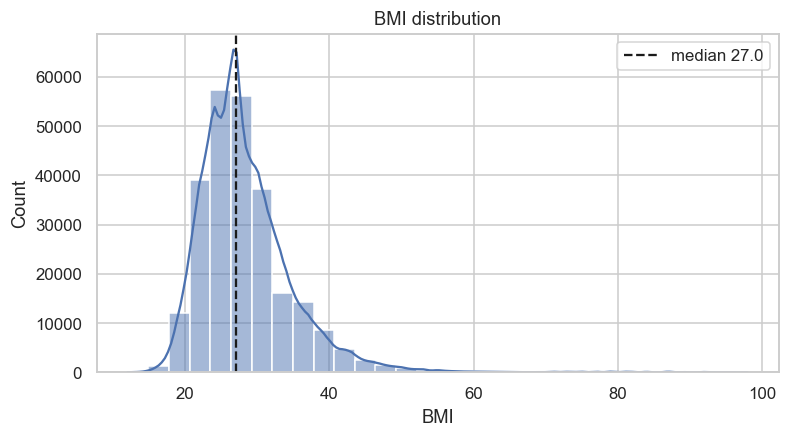

count    253680.00
mean         28.38
std           6.61
min          12.00
25%          24.00
50%          27.00
75%          31.00
max          98.00
Name: BMI, dtype: float64

In [4]:
# Cell 1.a.1 — BMI
plt.figure(figsize=(8,4))
sns.histplot(df['BMI'].dropna(), bins=30, kde=True)
plt.axvline(df['BMI'].median(), color='k', linestyle='--', label=f"median {df['BMI'].median():.1f}")
plt.xlabel("BMI")
plt.title("BMI distribution")
plt.legend()
plt.show()

# summary stats for BMI
df['BMI'].describe().round(2)


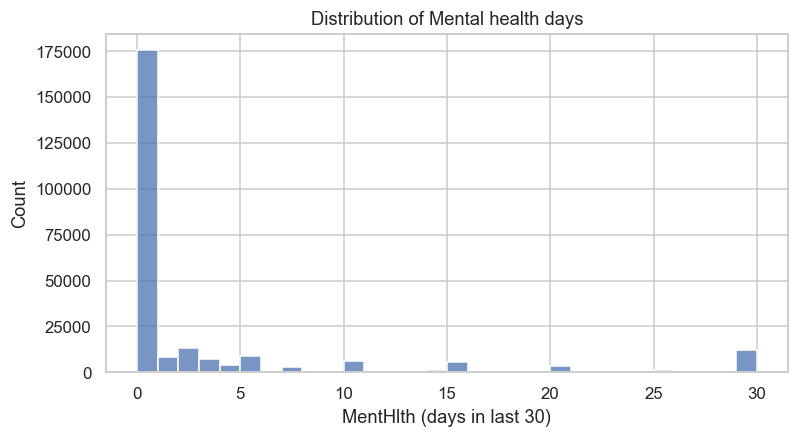

MentHlth
0     175680
1       8538
2      13054
3       7381
4       3789
5       9030
6        988
7       3100
8        639
9         91
10      6373
11        41
Name: count, dtype: int64

In [5]:
# Cell 1.a.2 — MentHlth
plt.figure(figsize=(8,4))
sns.histplot(df['MentHlth'].dropna(), bins=30)
plt.xlabel("MentHlth (days in last 30)")
plt.title("Distribution of Mental health days")
plt.show()

# show top counts (many zeros expected)
df['MentHlth'].value_counts().sort_index().head(12)


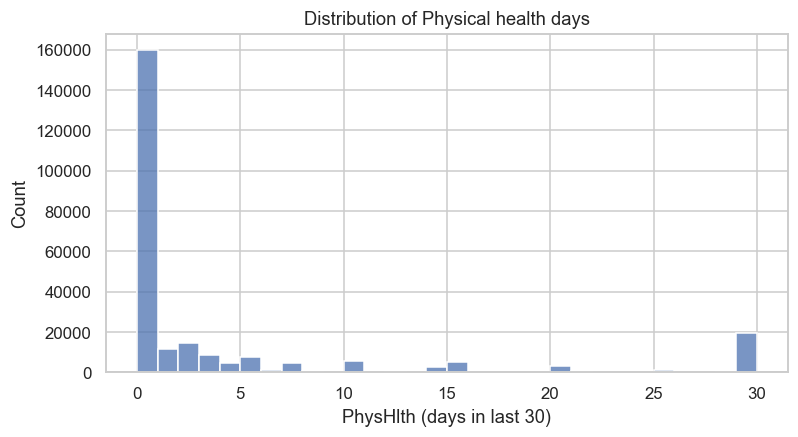

count    253680.00
mean          4.24
std           8.72
min           0.00
25%           0.00
50%           0.00
75%           3.00
max          30.00
Name: PhysHlth, dtype: float64

In [6]:
# Cell 1.a.3 — PhysHlth
plt.figure(figsize=(8,4))
sns.histplot(df['PhysHlth'].dropna(), bins=30)
plt.xlabel("PhysHlth (days in last 30)")
plt.title("Distribution of Physical health days")
plt.show()

df['PhysHlth'].describe().round(2)


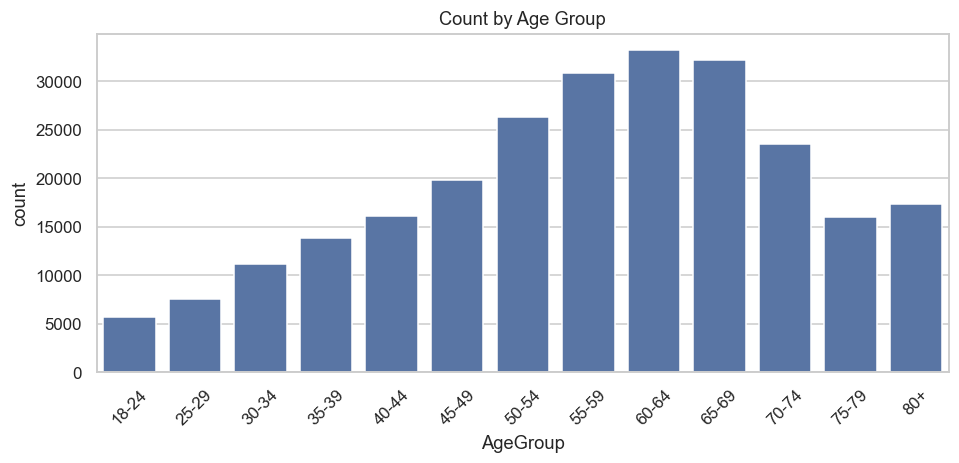

AgeGroup
18-24     5700
25-29     7598
30-34    11123
35-39    13823
40-44    16157
45-49    19819
50-54    26314
55-59    30832
60-64    33244
65-69    32194
70-74    23533
75-79    15980
80+      17363
Name: count, dtype: int64

In [7]:
# Cell 1.a.4 — Age group counts
age_order = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
plt.figure(figsize=(10,4))
sns.countplot(x='AgeGroup', data=df, order=age_order)
plt.xticks(rotation=45)
plt.title("Count by Age Group")
plt.show()
# show counts
df['AgeGroup'].value_counts().reindex(age_order)

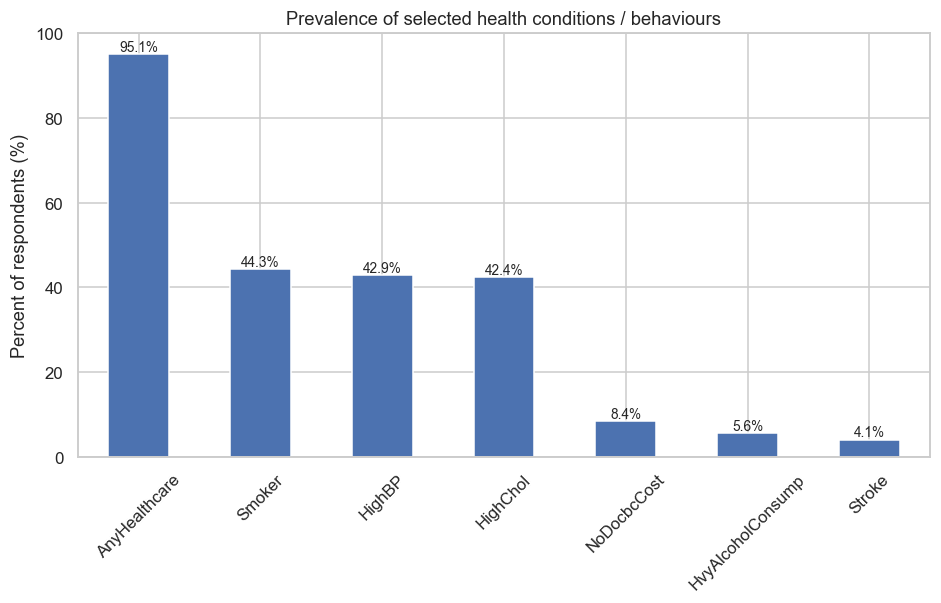

HighBP :
 {0: 57.1, 1: 42.9}

HighChol :
 {0: 57.59, 1: 42.41}

Smoker :
 {0: 55.68, 1: 44.32}

Stroke :
 {0: 95.94, 1: 4.06}

HvyAlcoholConsump :
 {0: 94.38, 1: 5.62}

AnyHealthcare :
 {1: 95.11, 0: 4.89}

NoDocbcCost :
 {0: 91.58, 1: 8.42}



<Figure size 1100x440 with 0 Axes>

<Figure size 1100x440 with 0 Axes>

In [8]:
# Cell 1.b — prevalence bar plots for selected binary conditions
conditions = ['HighBP','HighChol','Smoker','Stroke','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost']
plt.figure(figsize=(10,5))
prevalence = df[conditions].mean().sort_values(ascending=False) * 100   # percent
ax = prevalence.plot(kind='bar')
ax.set_ylabel("Percent of respondents (%)")
ax.set_ylim(0, 100)
plt.title("Prevalence of selected health conditions / behaviours")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)
plt.show()

# Also show value counts for each (optional)
for c in conditions:
    print(c, ":\n", df[c].value_counts(normalize=True).mul(100).round(2).to_dict())
    print()
# Cell 1.c — Education level counts
edu_order = ['Never/K','Grades1-8','Grades9-11','Grade12/GED','Some college','College graduate']
plt.figure(figsize=(10,4))

Counts
 HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64

Percent:
 HeartDiseaseorAttack
0    90.58
1     9.42
Name: proportion, dtype: float64


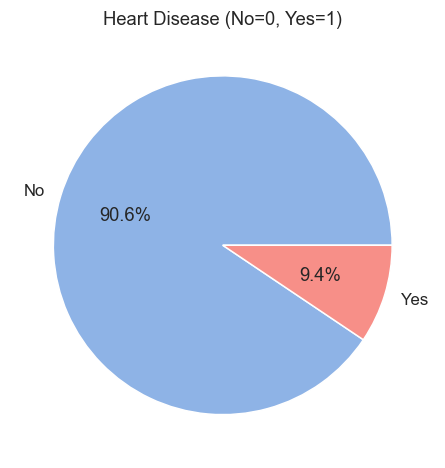

Proportion with heart disease: 0.094 (9.42%)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Never/K'),
  Text(1, 0, 'Grades1-8'),
  Text(2, 0, 'Grades9-11'),
  Text(3, 0, 'Grade12/GED'),
  Text(4, 0, 'Some college'),
  Text(5, 0, 'College graduate')])

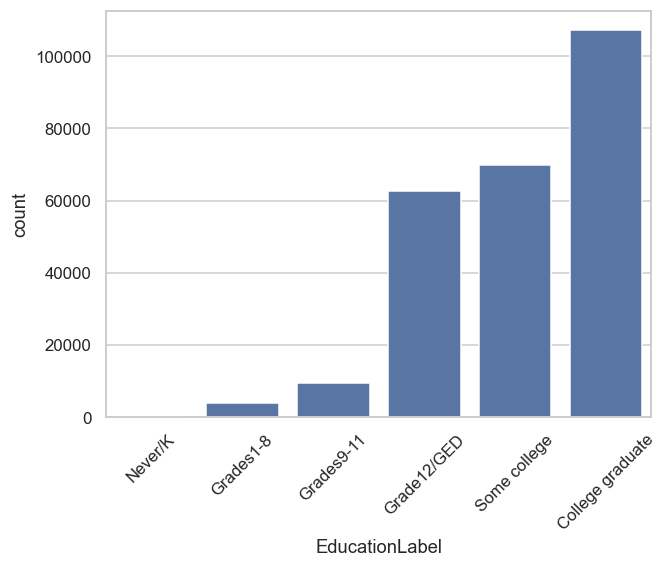

In [9]:
# Cell 1.c — target distribution
target_counts = df['HeartDiseaseorAttack'].value_counts()
print("Counts\n", target_counts)
print("\nPercent:\n", df['HeartDiseaseorAttack'].value_counts(normalize=True).mul(100).round(2))

# pie chart
plt.figure(figsize=(5,5))
target_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No','Yes'], colors=['#8eb3e6','#f78f88'])
plt.title("Heart Disease (No=0, Yes=1)")
plt.ylabel("")
plt.show()

# imbalance ratio
imbalance = target_counts.iloc[1] / target_counts.sum()
print(f"Proportion with heart disease: {imbalance:.3f} ({imbalance*100:.2f}%)")
sns.countplot(x='EducationLabel', data=df, order=edu_order)
plt.xticks(rotation=45)

,No_HeartDisease(0),Yes_HeartDisease(1)
HighBP,39.56,75.03
HighChol,39.53,70.12
Smoker,42.48,61.95
Stroke,2.77,16.48
DiffWalk,14.26,41.50
HvyAlcoholConsump,5.83,3.55


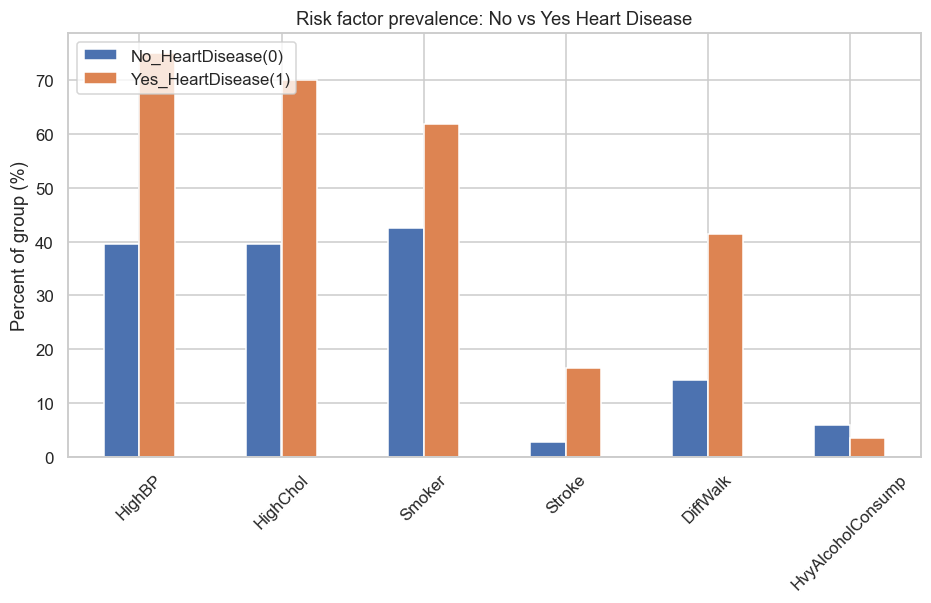

In [10]:
# Cell 2.a — risk factor comparison by HeartDisease
risk_cols = ['HighBP','HighChol','Smoker','Stroke','DiffWalk','HvyAlcoholConsump']
group = df.groupby('HeartDiseaseorAttack')[risk_cols].mean().T * 100  # percent
group.columns = ['No_HeartDisease(0)', 'Yes_HeartDisease(1)']
display(group.round(2))

# plot side-by-side bars
group.plot(kind='bar', figsize=(10,5))
plt.ylabel("Percent of group (%)")
plt.title("Risk factor prevalence: No vs Yes Heart Disease")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


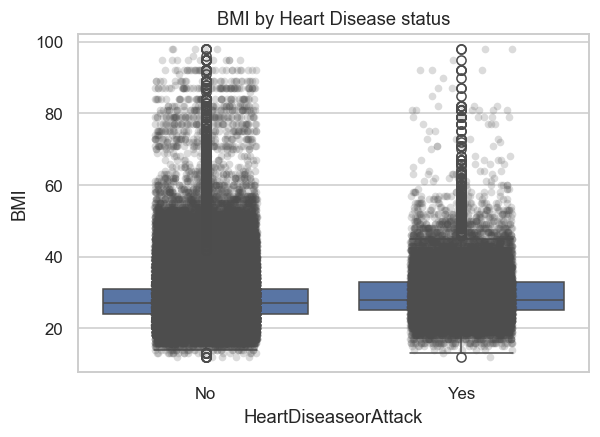

<Figure size 1100x440 with 0 Axes>

<Figure size 1100x440 with 0 Axes>

In [11]:
# Cell 2.a.2 — BMI boxplot + mean
plt.figure(figsize=(6,4))
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df)
sns.stripplot(x='HeartDiseaseorAttack', y='BMI', data=df, color='0.3', alpha=0.2, jitter=0.2)
plt.xticks([0,1], ['No','Yes'])
plt.title("BMI by Heart Disease status")
plt.show()

# group means
df.groupby('HeartDiseaseorAttack')['BMI'].agg(['mean','median','std']).round(2)
# Cell 2.b — Age group distribution by HeartDisease
age_order = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
plt.figure(figsize=(10,4))

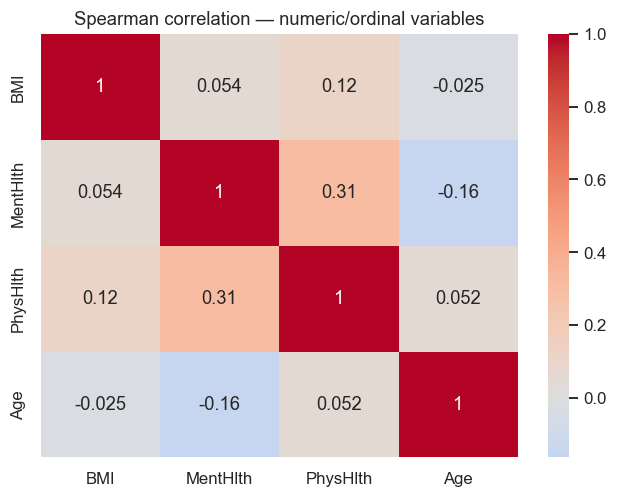

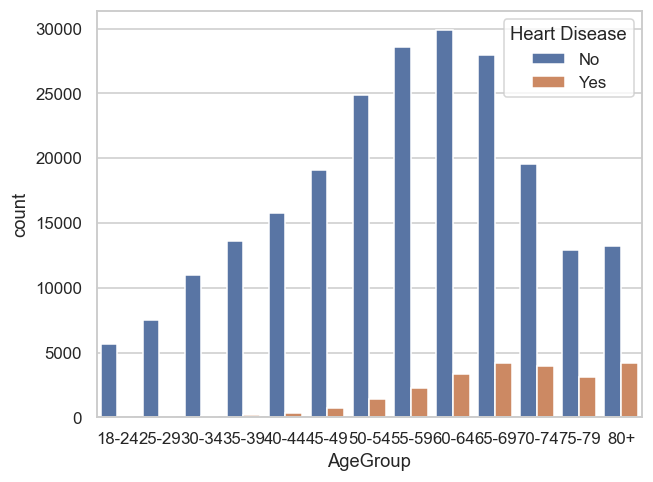

In [12]:
# Cell 2.b — correlation heatmap
num_cols = ['BMI','MentHlth','PhysHlth','Age']  # can add Income/Education if you treat them ordinal
corr = df[num_cols].corr(method='spearman')
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman correlation — numeric/ordinal variables")
plt.show()
sns.countplot(x='AgeGroup', data=df, hue='HeartDiseaseorAttack', order=age_order)
plt.legend(title='Heart Disease', labels=['No','Yes'])  

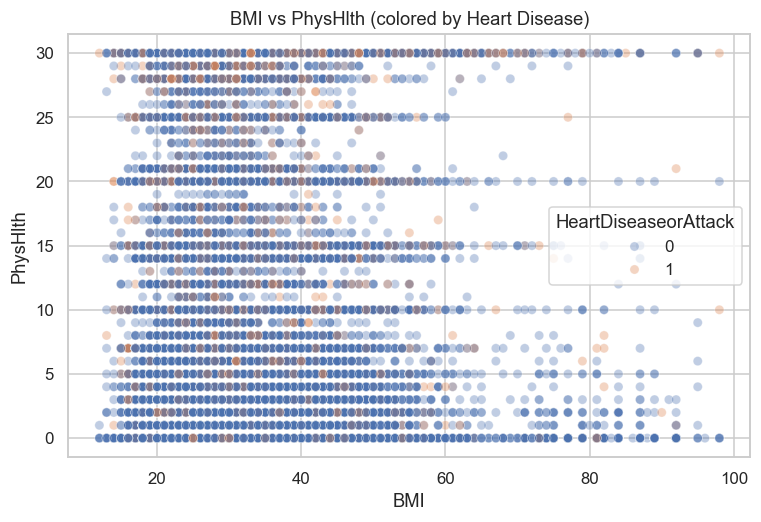

In [13]:
# Cell 2.b.2 — scatter BMI vs PhysHlth colored by HeartDisease
plt.figure(figsize=(8,5))
sns.scatterplot(x='BMI', y='PhysHlth', hue='HeartDiseaseorAttack', data=df, alpha=0.35)
plt.title("BMI vs PhysHlth (colored by Heart Disease)")
plt.show()


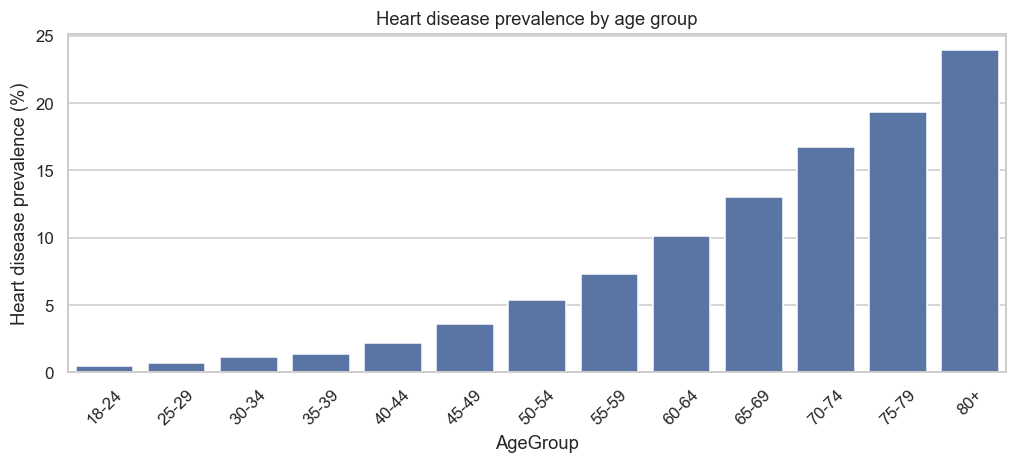

AgeGroup
18-24     0.51
25-29     0.71
30-34     1.13
35-39     1.40
40-44     2.17
45-49     3.59
50-54     5.42
55-59     7.31
60-64    10.10
65-69    13.02
70-74    16.77
75-79    19.36
80+      23.95
Name: HeartDiseaseorAttack, dtype: float64

In [14]:
# Cell 2.c.1 — prevalence by AgeGroup
age_order = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
age_prev = df.groupby('AgeGroup')['HeartDiseaseorAttack'].mean().reindex(age_order) * 100
plt.figure(figsize=(11,4))
sns.barplot(x=age_prev.index, y=age_prev.values)
plt.xticks(rotation=45)
plt.ylabel("Heart disease prevalence (%)")
plt.title("Heart disease prevalence by age group")
plt.show()

age_prev.round(2)


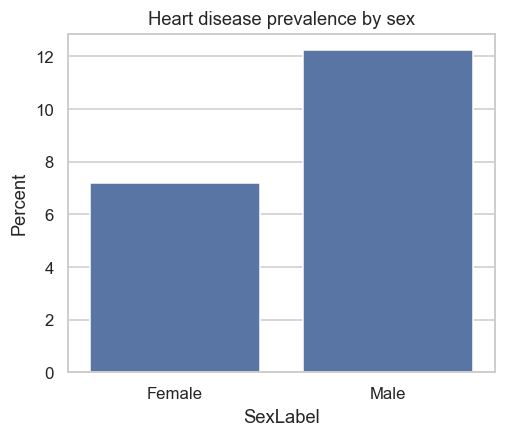

SexLabel
Female     7.19
Male      12.25
Name: HeartDiseaseorAttack, dtype: float64

In [15]:
# Cell 2.c.2 — by Sex
sex_prev = df.groupby('SexLabel')['HeartDiseaseorAttack'].mean() * 100
plt.figure(figsize=(5,4))
sns.barplot(x=sex_prev.index, y=sex_prev.values)
plt.title("Heart disease prevalence by sex")
plt.ylabel("Percent")
plt.show()

sex_prev.round(2)


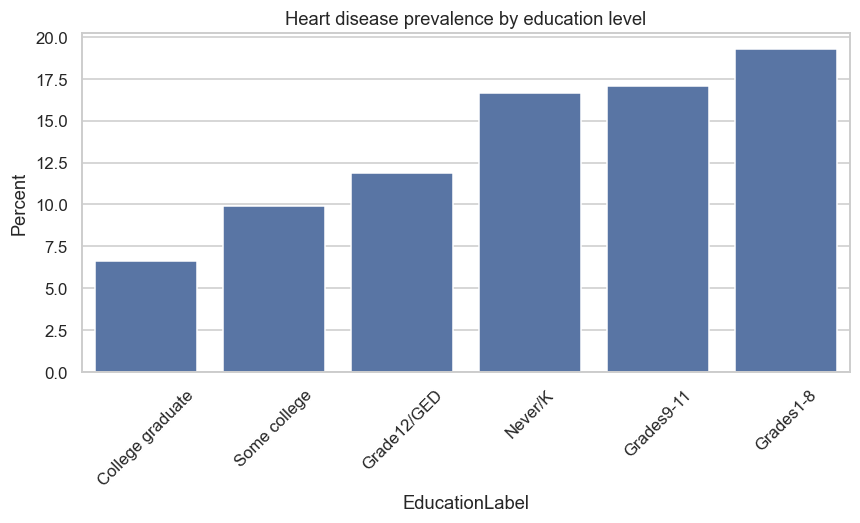

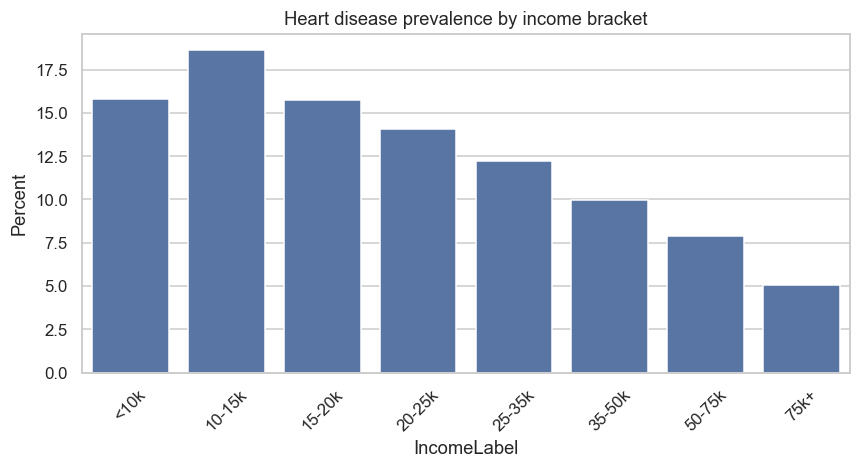

In [16]:
# Cell 2.c.3 — by Education
edu_prev = df.groupby('EducationLabel')['HeartDiseaseorAttack'].mean().sort_values() * 100
plt.figure(figsize=(9,4))
sns.barplot(x=edu_prev.index, y=edu_prev.values)
plt.xticks(rotation=45)
plt.title("Heart disease prevalence by education level")
plt.ylabel("Percent")
plt.show()

# By Income
inc_prev = df.groupby('IncomeLabel')['HeartDiseaseorAttack'].mean().reindex(list(income_map.values())) * 100
plt.figure(figsize=(9,4))
sns.barplot(x=inc_prev.index, y=inc_prev.values)
plt.xticks(rotation=45)
plt.title("Heart disease prevalence by income bracket")
plt.ylabel("Percent")
plt.show()


Chi2: 11117.88314142127 p-value: 0.0
Contingency table:
 HeartDiseaseorAttack       0      1
HighBP                             
0                     138886   5965
1                      90901  17928


<Axes: xlabel='HeartDiseaseorAttack', ylabel='HighBP'>

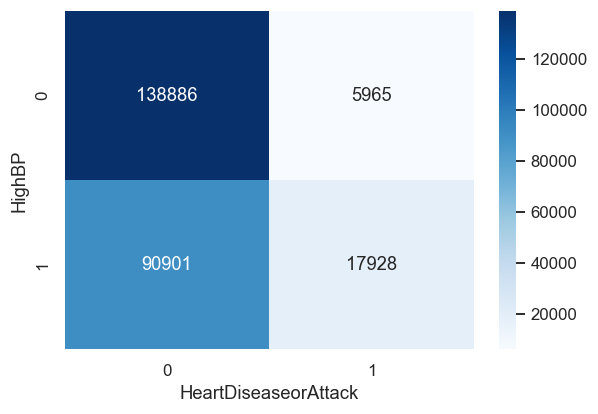

In [17]:
# Cell extra — chi-square example (HighBP vs HeartDisease)
from scipy.stats import chi2_contingency

ct = pd.crosstab(df['HighBP'], df['HeartDiseaseorAttack'])
chi2, p, dof, ex = chi2_contingency(ct)
print("Chi2:", chi2, "p-value:", p)
print("Contingency table:\n", ct)
plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')  


Key Insights from EDA :

Heart Disease Prevalence:

About 9% of respondents reported having heart disease or a heart attack.

The dataset is therefore imbalanced, with far more “No” cases than “Yes”.

Risk Factors

Individuals with High Blood Pressure and High Cholesterol show a much higher prevalence of heart disease.

Chi-square tests confirm these associations are statistically significant (p < 0.001).

Other conditions such as stroke history and difficulty walking (DiffWalk) also show strong links with heart disease.

Demographics

Age is a strong predictor: prevalence rises sharply in older groups, especially above 55 years.

Sex: Males show slightly higher rates of heart disease than females.

Education & Income: Lower education and income groups show higher prevalence, suggesting socioeconomic factors play a role.

Lifestyle & Health Indicators

BMI is concentrated between 20–35, with higher averages among heart disease patients.

Most people report very few unhealthy mental (MentHlth) or physical health days (PhysHlth), though those with heart disease report higher counts.

Smoking and heavy alcohol consumption appear moderately associated with heart disease.

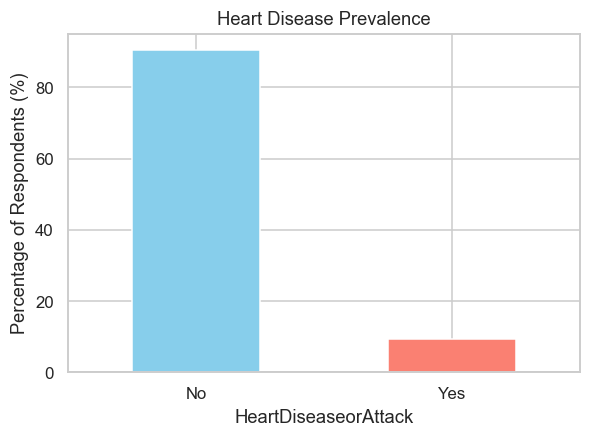

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Heart Disease prevalence (Yes vs No)
plt.figure(figsize=(6,4))
df['HeartDiseaseorAttack'].value_counts(normalize=True).mul(100).plot(
    kind="bar", color=["skyblue", "salmon"]
)
plt.title("Heart Disease Prevalence")
plt.xticks([0,1], ["No", "Yes"], rotation=0)
plt.ylabel("Percentage of Respondents (%)")
plt.show()


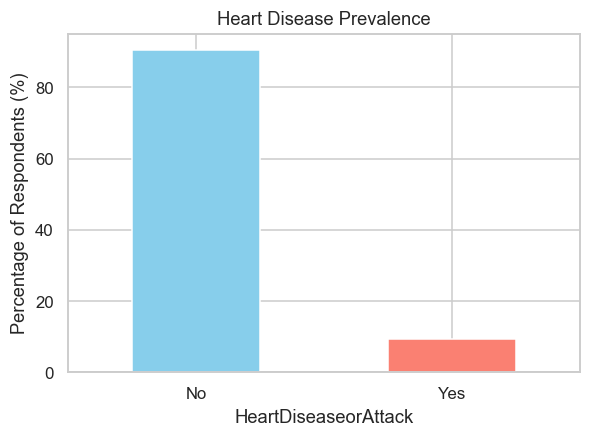

HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64

In [19]:
# Heart Disease prevalence (Yes vs No)
plt.figure(figsize=(6,4))
df['HeartDiseaseorAttack'].value_counts(normalize=True).mul(100).plot(
    kind="bar", color=["skyblue", "salmon"]
)
plt.title("Heart Disease Prevalence")
plt.xticks([0,1], ["No", "Yes"], rotation=0)
plt.ylabel("Percentage of Respondents (%)")
plt.show()
# show counts
df['HeartDiseaseorAttack'].value_counts()   

C:\Users\swapn\AppData\Local\Temp\ipykernel_23384\4033357996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="HighBP", y="HeartDiseaseorAttack", data=df, palette=["skyblue","salmon"])


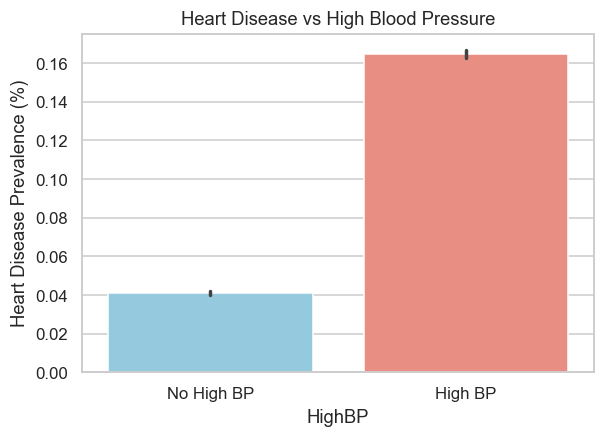

C:\Users\swapn\AppData\Local\Temp\ipykernel_23384\4033357996.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Smoker", y="HeartDiseaseorAttack", data=df, palette=["skyblue","salmon"])


([<matplotlib.axis.XTick at 0x1a5d74fe900>,
 [Text(0, 0, 'Non-Smoker'), Text(1, 0, 'Smoker')])

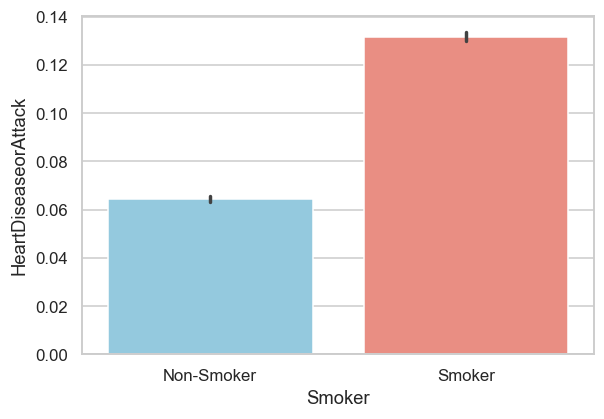

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x="HighBP", y="HeartDiseaseorAttack", data=df, palette=["skyblue","salmon"])
plt.xticks([0,1], ["No High BP","High BP"])
plt.ylabel("Heart Disease Prevalence (%)")
plt.title("Heart Disease vs High Blood Pressure")
plt.show()
plt.figure(figsize=(6,4))
sns.barplot(x="Smoker", y="HeartDiseaseorAttack", data=df, palette=["skyblue","salmon"])
plt.xticks([0,1], ["Non-Smoker","Smoker"])  

C:\Users\swapn\AppData\Local\Temp\ipykernel_23384\1874376237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_prev.index, y=age_prev.values, palette="viridis")


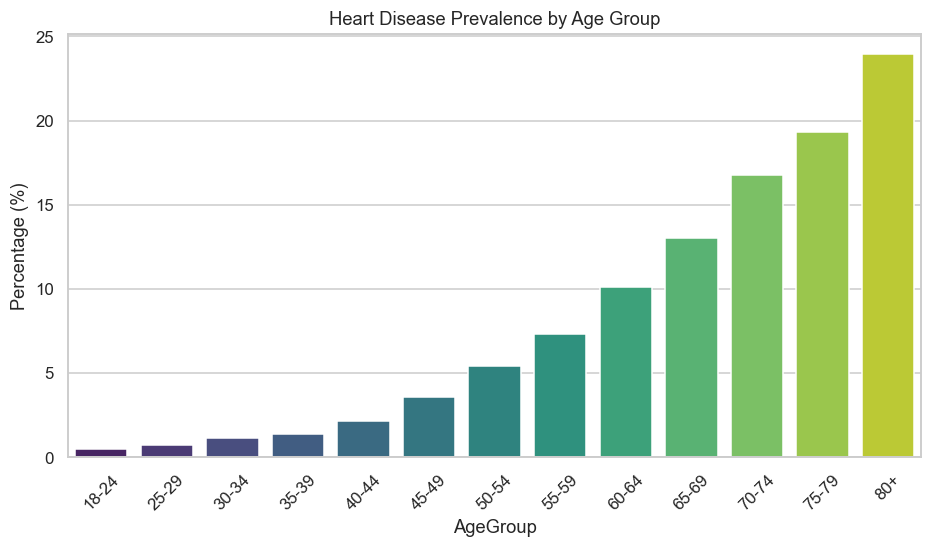

C:\Users\swapn\AppData\Local\Temp\ipykernel_23384\1874376237.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_prev = df.groupby('BMICategory')['HeartDiseaseorAttack'].mean().mul(100).reindex(bmi_labels)


<Figure size 1100x550 with 0 Axes>

<Figure size 1100x550 with 0 Axes>

In [21]:
age_prev = df.groupby('AgeGroup')['HeartDiseaseorAttack'].mean().mul(100).reindex(age_labels.values())

plt.figure(figsize=(10,5))
sns.barplot(x=age_prev.index, y=age_prev.values, palette="viridis")
plt.title("Heart Disease Prevalence by Age Group")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()
# Heart Disease prevalence by BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
bmi_prev = df.groupby('BMICategory')['HeartDiseaseorAttack'].mean().mul(100).reindex(bmi_labels)
plt.figure(figsize=(10,5))  

C:\Users\swapn\AppData\Local\Temp\ipykernel_23384\23782479.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['HeartDiseaseorAttack']==0, 'BMI'], label="No Heart Disease", shade=True, color="skyblue")
C:\Users\swapn\AppData\Local\Temp\ipykernel_23384\23782479.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['HeartDiseaseorAttack']==1, 'BMI'], label="Heart Disease", shade=True, color="salmon")


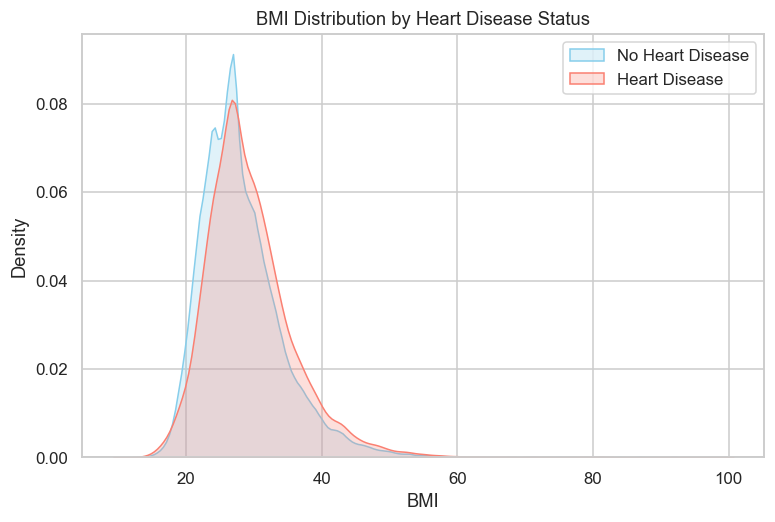

Text(0.5, 1.0, 'Heart Disease Prevalence by BMI Category')

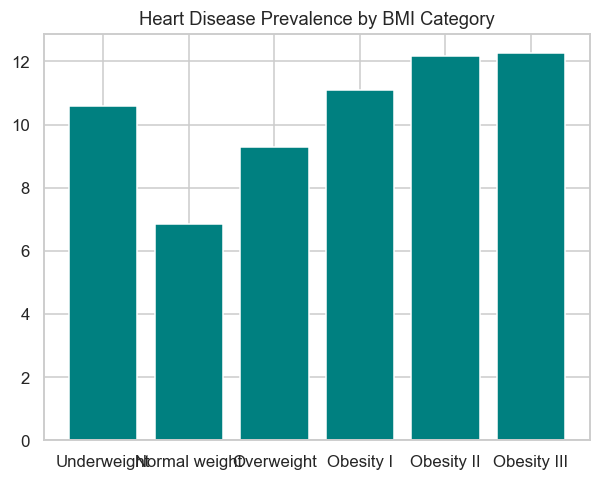

In [22]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df['HeartDiseaseorAttack']==0, 'BMI'], label="No Heart Disease", shade=True, color="skyblue")
sns.kdeplot(df.loc[df['HeartDiseaseorAttack']==1, 'BMI'], label="Heart Disease", shade=True, color="salmon")
plt.title("BMI Distribution by Heart Disease Status")
plt.xlabel("BMI")
plt.legend()
plt.show()
plt.bar(bmi_prev.index, bmi_prev.values, color="teal")
plt.title("Heart Disease Prevalence by BMI Category")   

Component 4: Data Visualization

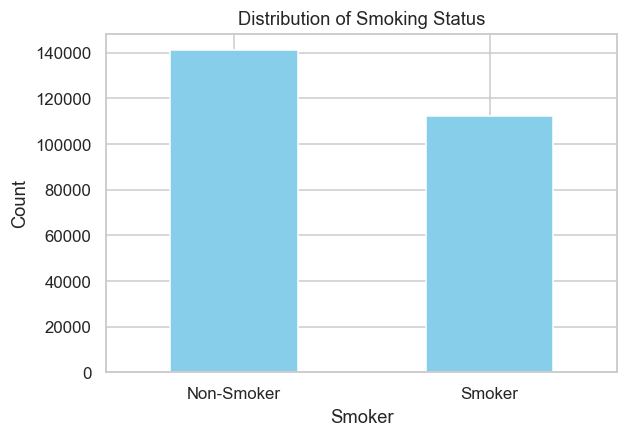

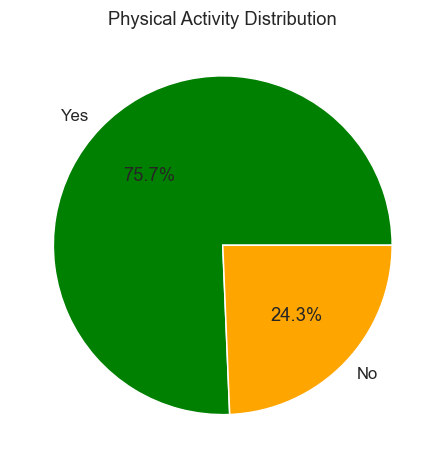

In [23]:
# Smoking status
plt.figure(figsize=(6,4))
df['Smoker'].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Smoking Status")
plt.xticks([0,1], ["Non-Smoker", "Smoker"], rotation=0)
plt.ylabel("Count")
plt.show()

# Pie chart for Physical Activity
df['PhysActivity'].value_counts().plot(
    kind="pie", labels=["Yes","No"], autopct='%1.1f%%', colors=["green","orange"], figsize=(5,5)
)
plt.title("Physical Activity Distribution")
plt.ylabel("")
plt.show()


C:\Users\swapn\AppData\Local\Temp\ipykernel_23384\1640918549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Smoker", y="HeartDiseaseorAttack", data=df, palette="coolwarm")


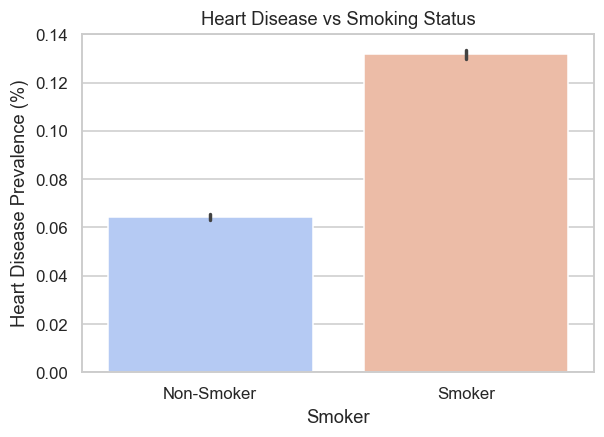

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x="Smoker", y="HeartDiseaseorAttack", data=df, palette="coolwarm")
plt.xticks([0,1], ["Non-Smoker","Smoker"])
plt.ylabel("Heart Disease Prevalence (%)")
plt.title("Heart Disease vs Smoking Status")
plt.show()


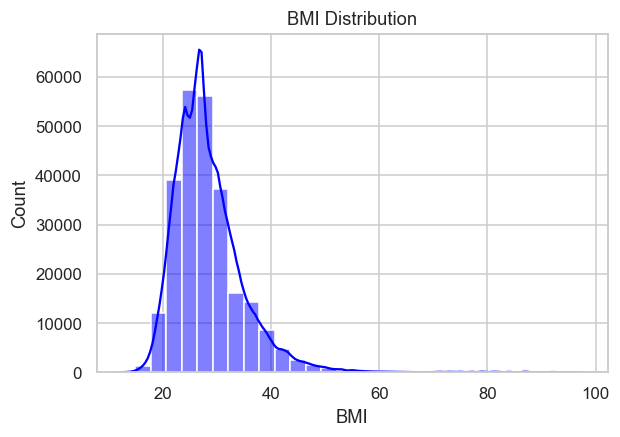

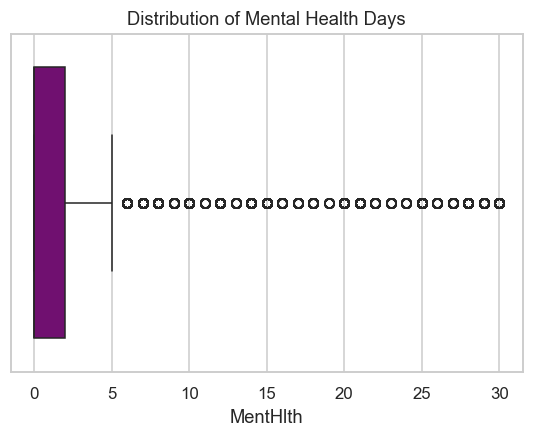

In [25]:
# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['BMI'], bins=30, kde=True, color="blue")
plt.title("BMI Distribution")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['MentHlth'], color="purple")
plt.title("Distribution of Mental Health Days")
plt.show()


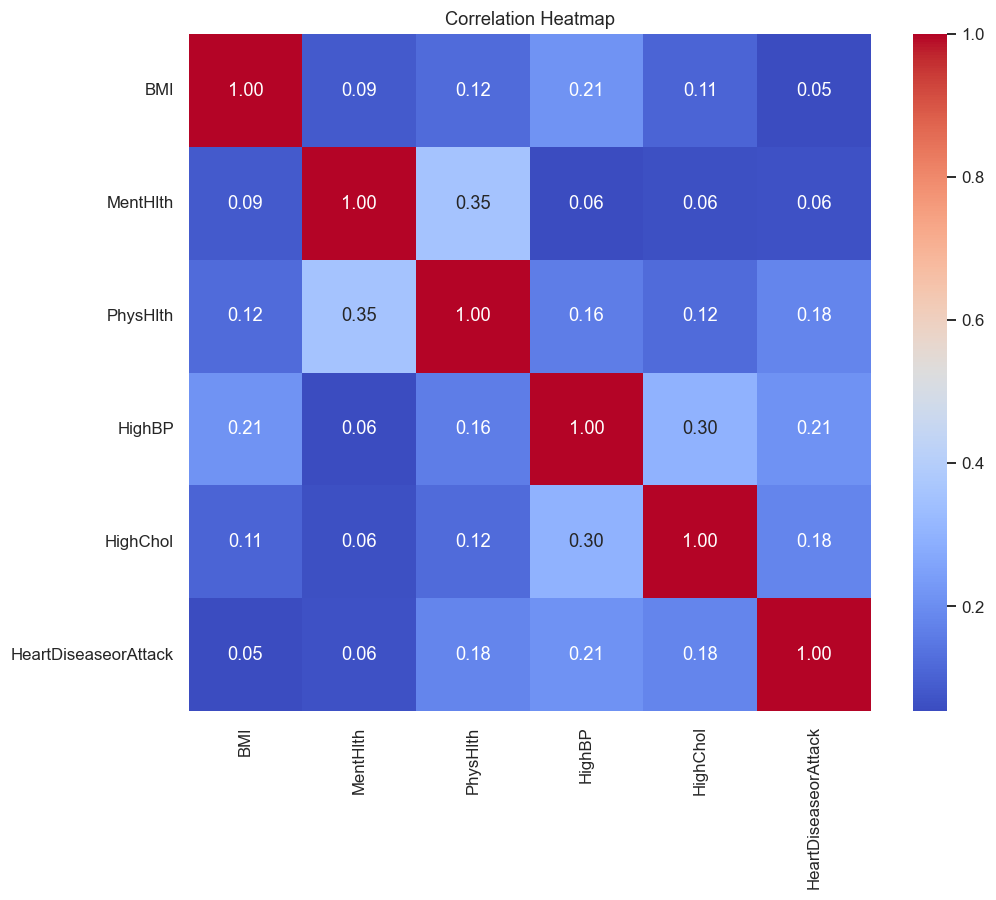

In [26]:
plt.figure(figsize=(10,8))
corr = df[['BMI','MentHlth','PhysHlth','HighBP','HighChol','HeartDiseaseorAttack']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



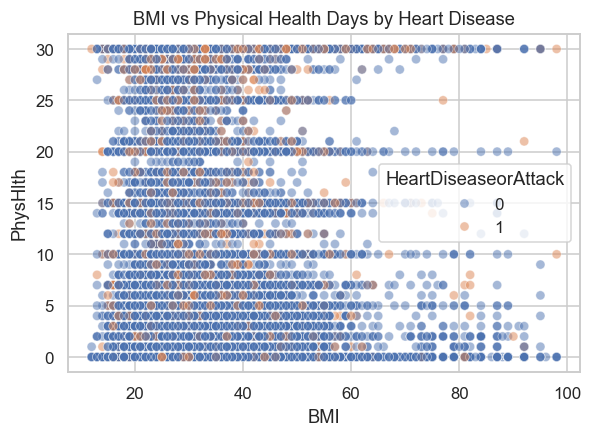

<Figure size 1100x550 with 0 Axes>

<Figure size 1100x550 with 0 Axes>

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="BMI", y="PhysHlth", hue="HeartDiseaseorAttack", data=df, alpha=0.5)
plt.title("BMI vs Physical Health Days by Heart Disease")
plt.show()
plt.figure(figsize=(10,5))

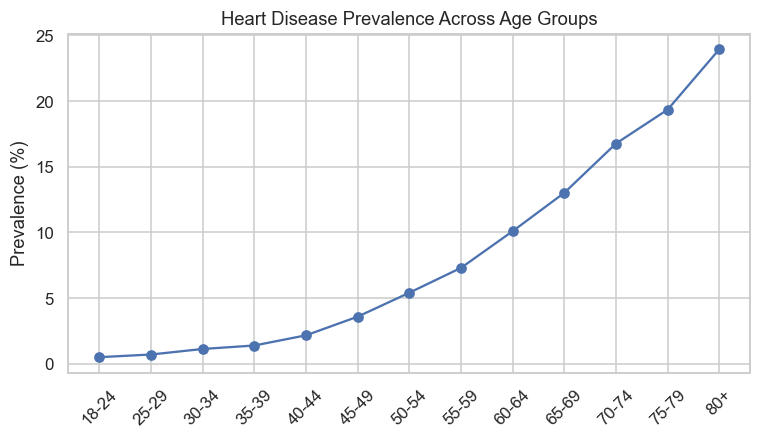

In [28]:
age_prev = df.groupby('AgeGroup')['HeartDiseaseorAttack'].mean().mul(100)
plt.figure(figsize=(8,4))
plt.plot(age_prev.index, age_prev.values, marker='o')
plt.title("Heart Disease Prevalence Across Age Groups")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=45)
plt.show()


C:\Users\swapn\AppData\Local\Temp\ipykernel_23384\1081800912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="HeartDiseaseorAttack", y="BMI", data=df, palette="muted")


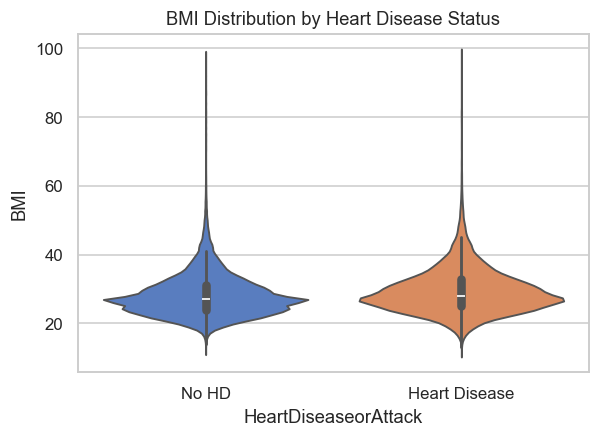

In [29]:
plt.figure(figsize=(6,4))
sns.violinplot(x="HeartDiseaseorAttack", y="BMI", data=df, palette="muted")
plt.xticks([0,1], ["No HD","Heart Disease"])
plt.title("BMI Distribution by Heart Disease Status")
plt.show()


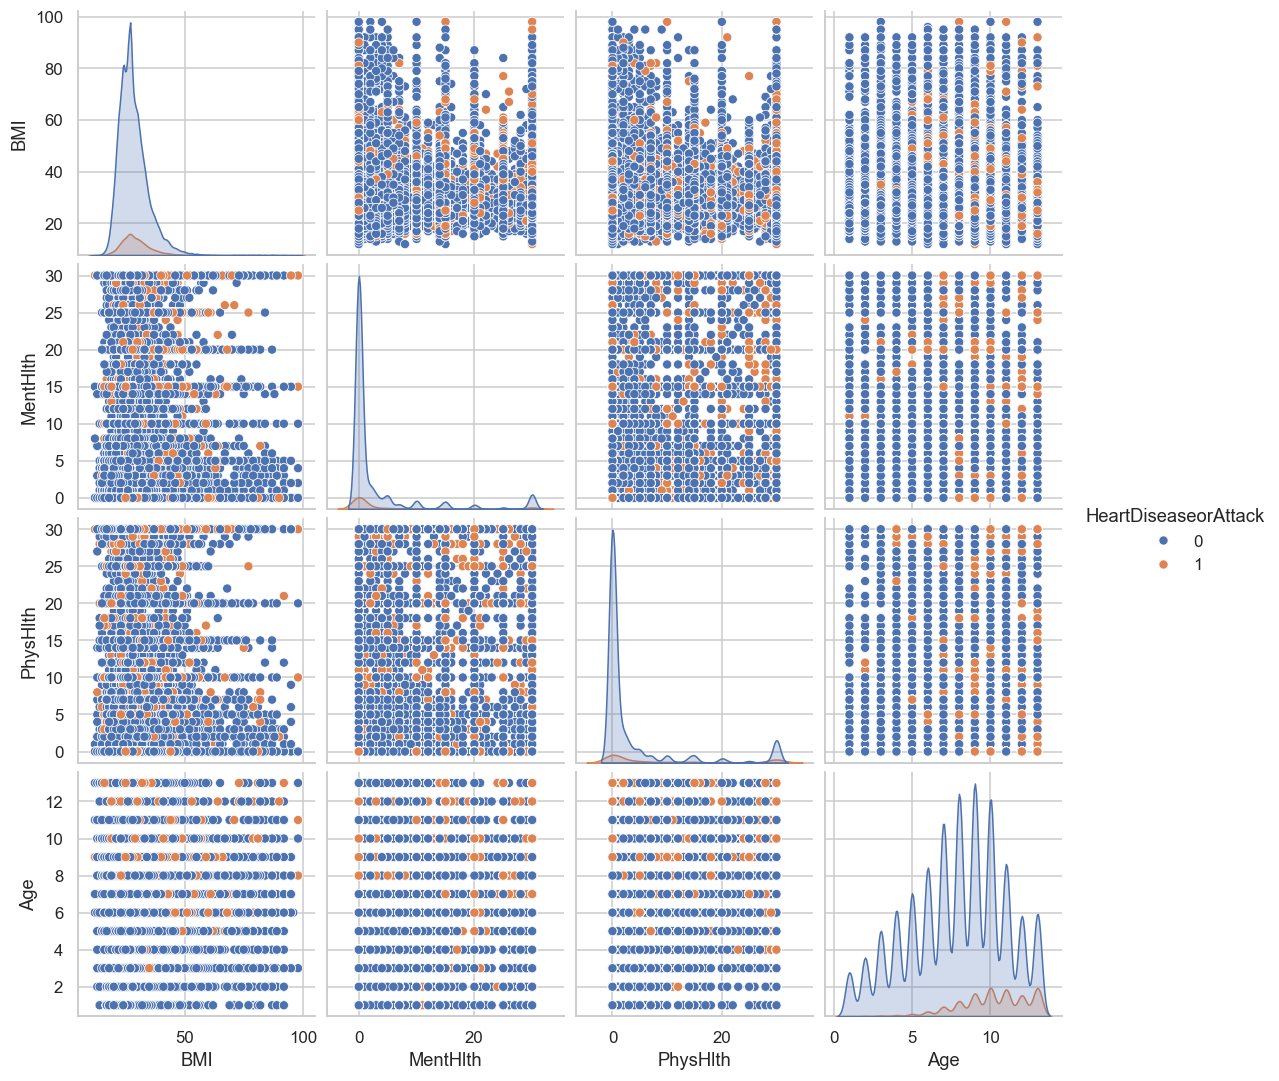

In [30]:
sns.pairplot(df[['BMI','MentHlth','PhysHlth','Age','HeartDiseaseorAttack']], hue="HeartDiseaseorAttack", diag_kind="kde")
plt.show()
